In [253]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [254]:
import csv
import numpy as np

def read_data(filename) :
    infile = open(filename, 'r')
    reader = csv.reader(infile, delimiter = ",")
    
    rowlist = []
    for row in reader :
        rowlist.append(row)
    
    infile.close()
    array = np.array(rowlist[1:], dtype = np.float)
    array = np.concatenate((np.ones((array.shape[0], 1)), array), axis = 1)
    array_x = array[:, :-1]
    array_y = array[:, -1]
    array_y = array_y.reshape(array_y.shape[0], 1)
    return array_x, array_y

In [255]:
def process_data(x, y) :
    mean_x = np.mean(x, axis = 0)
    mean_x[0] = 0
    sdev_x = np.std(x, axis = 0)
    sdev_x[0] = 1
    x = (x - mean_x) / sdev_x
    
    mean_y = np.mean(y)
    sdev_y = np.std(y)
    y = (y - mean_y) / sdev_y
    return x, y

In [256]:
x_train, y_train = read_data('train.csv')
x_train, y_train = process_data(x_train, y_train)

In [279]:
def comparison_plot(x, y, w) :
    slice_size = x.shape[0] / 10
    x_sliced = x[:slice_size, ]
#     print x_sliced.shape[0], x_sliced.shape[1]
    x_feature = x_sliced[:, 1].reshape(slice_size)
    print x_feature.shape[0]#, x_feature.shape[1]
#     print x_feature'
    y_sliced = y[:slice_size, ].reshape(slice_size)
    print y_sliced.shape[0]#, y_sliced.shape[1]

    plt.figure(figsize = (20, 10), dpi = 100)
    plt.plot(x_feature, y_sliced, 'ro')
    plt.plot(x_feature, np.dot(x_sliced, w))
    plt.show()

1000
1000


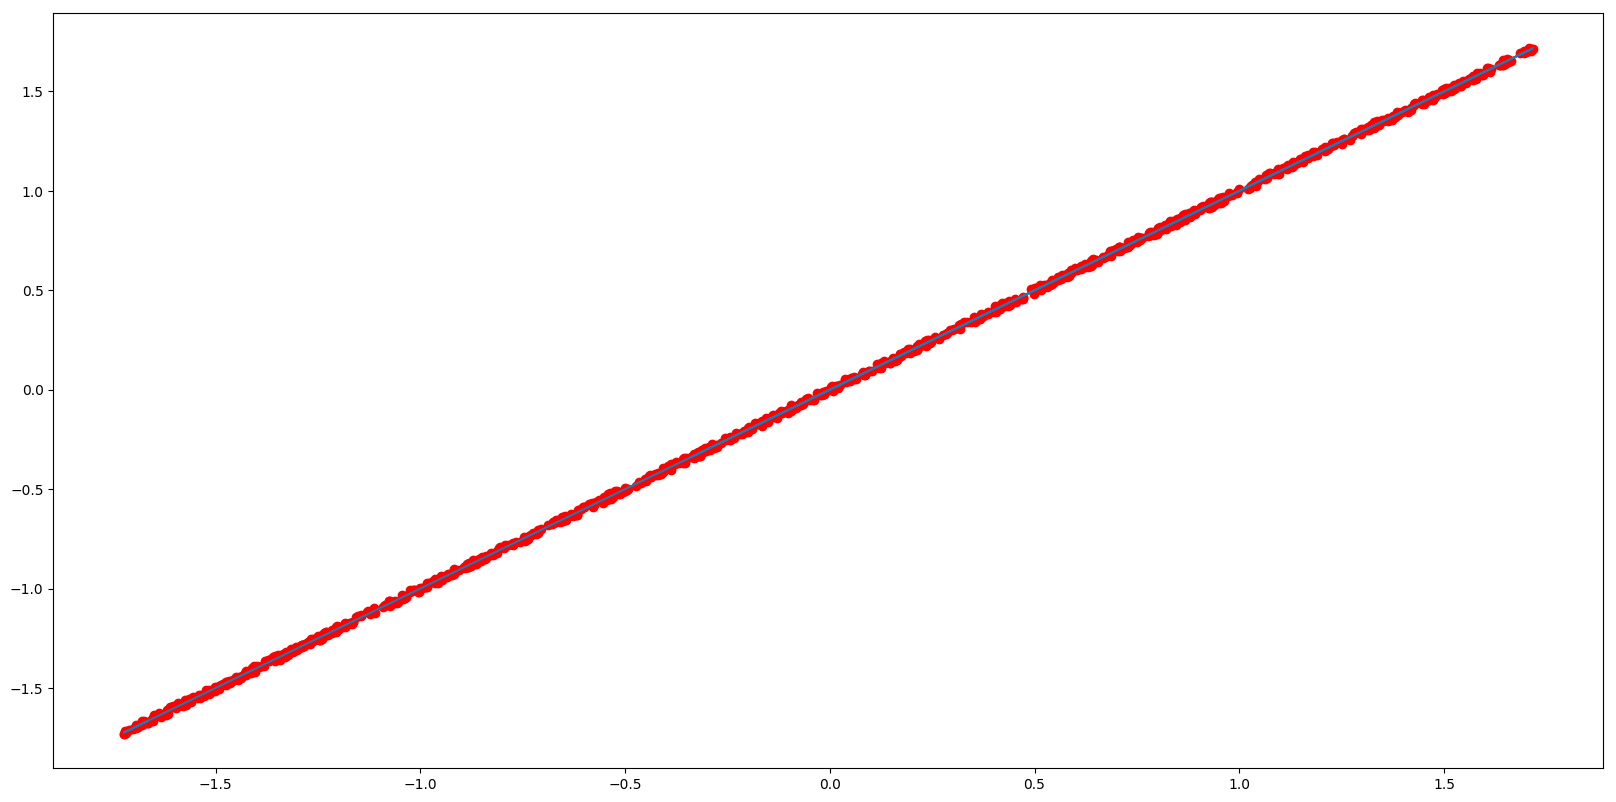

In [280]:
z1 = np.linalg.inv(np.matmul(np.transpose(x_train), x_train))
z2 = np.matmul(np.transpose(x_train), y_train)
w2 = np.matmul(z1, z2)
comparison_plot(x_train, y_train, w2)

In [281]:
def grad_descent(x, y, w, lr, epochs) :

    for i in range(epochs) :
        activation = np.matmul(x, w) - y
        differential = np.matmul(np.transpose(x), activation)
        w = w - (lr * differential) 
    
    return w

In [282]:
w1 = np.random.randn(x_train.shape[1], 1)
print w1

[[1.30332304]
 [0.08993531]]


1000
1000


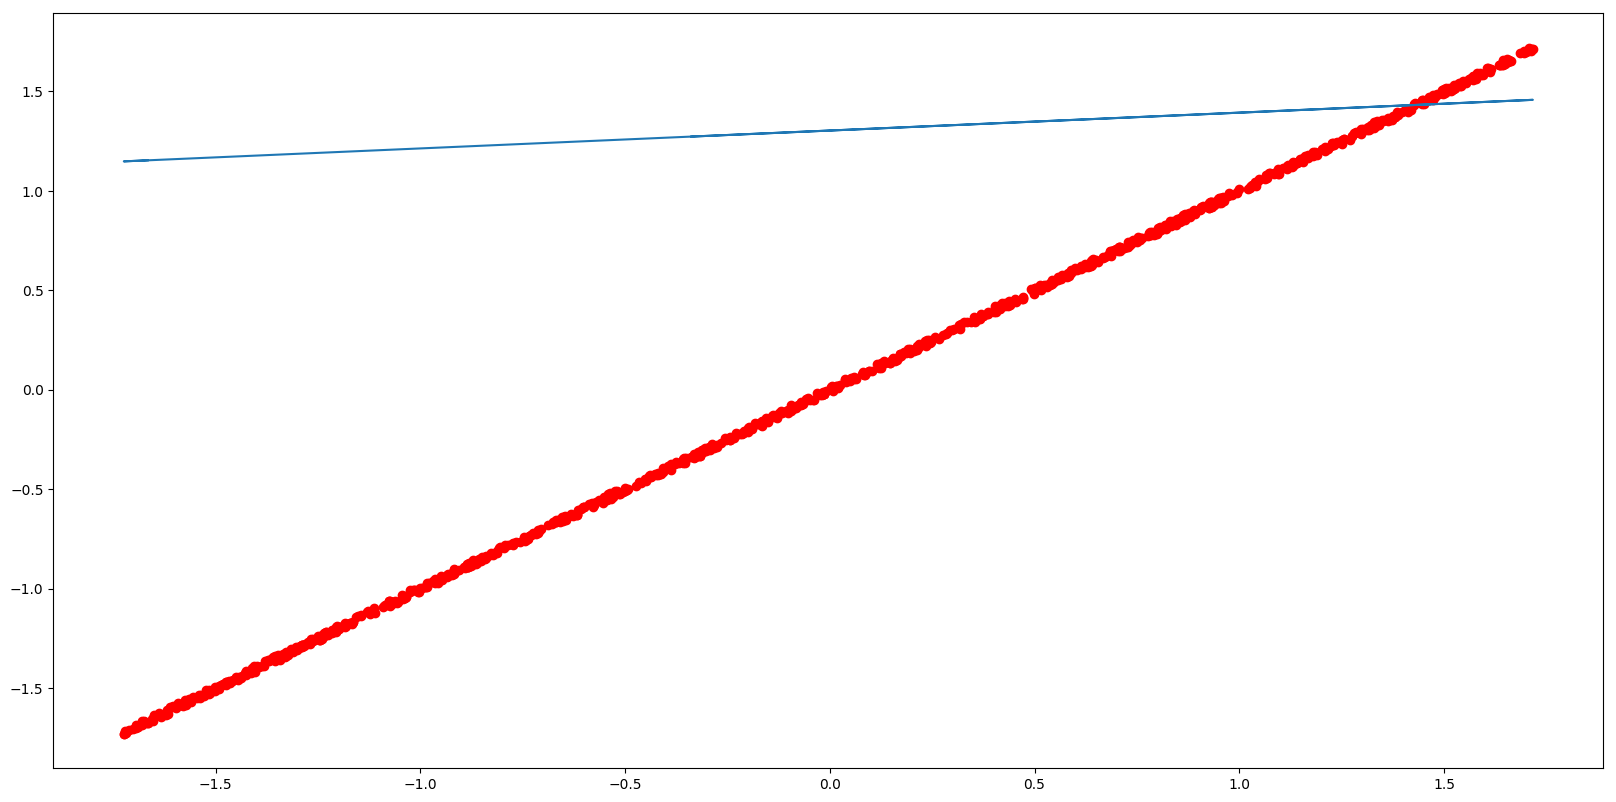

1000
1000


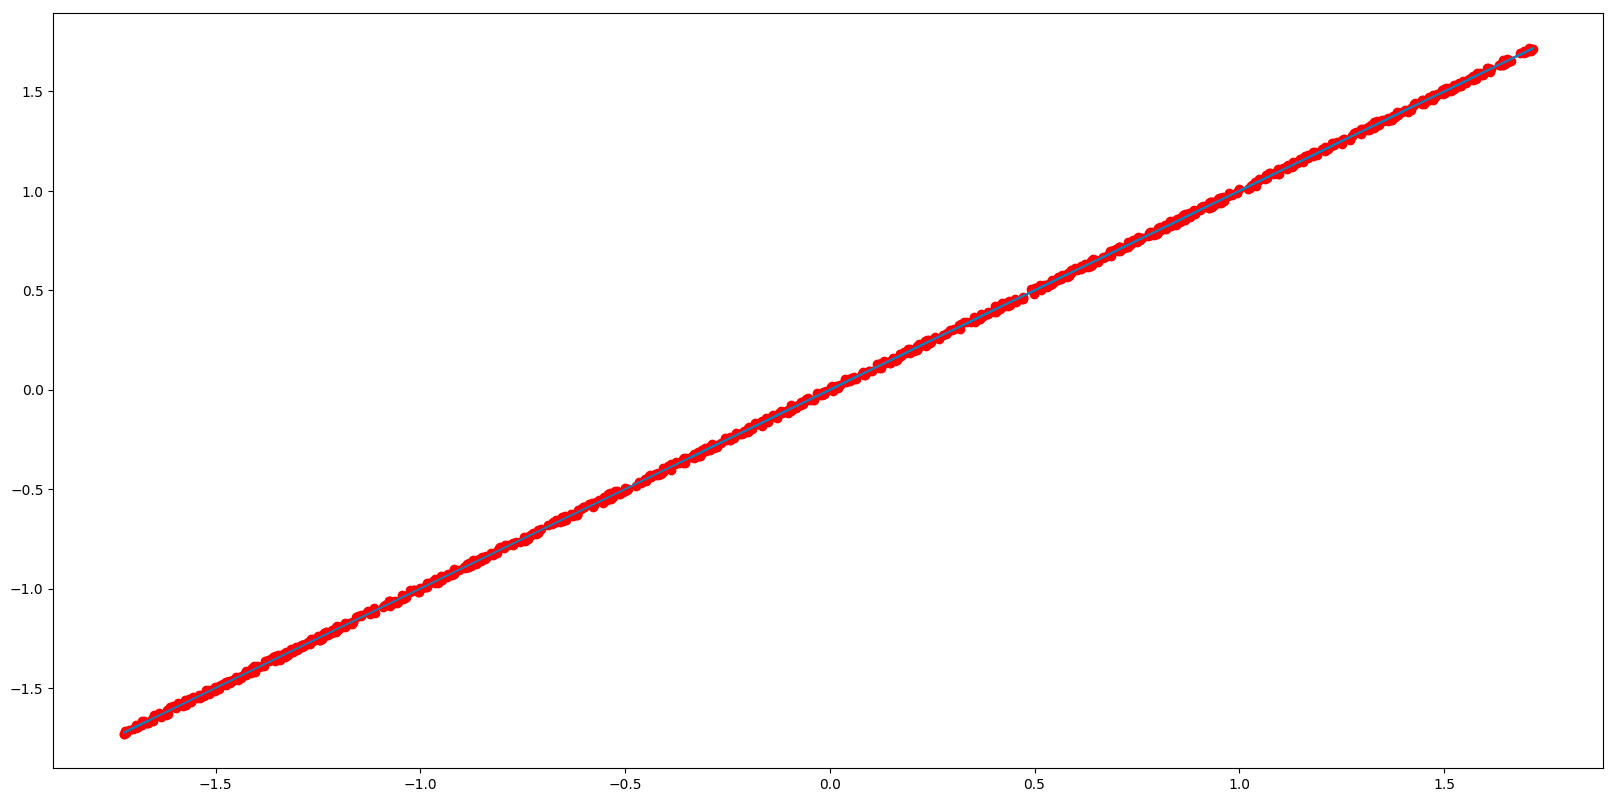

In [283]:
comparison_plot(x_train, y_train, w1)
w1 = grad_descent(x_train, y_train, w1, 0.0000001, 10000)
comparison_plot(x_train, y_train, w1)

In [227]:
from sklearn.metrics import mean_squared_error

def evaluate(w1, w2) :
    x_test, y_test = read_data('test.csv')
    x_test, y_test = process_data(x_test, y_test)
    pred1 = np.matmul(x_test, w1)
    error1 = mean_squared_error(y_test, pred1)
    pred2 = np.matmul(x_test, w2)
    error2 = mean_squared_error(y_test, pred2)
    return error1, error2

In [228]:
print evaluate(w1, w2)

(7.97499288931971e-07, 7.798107102457979e-07)


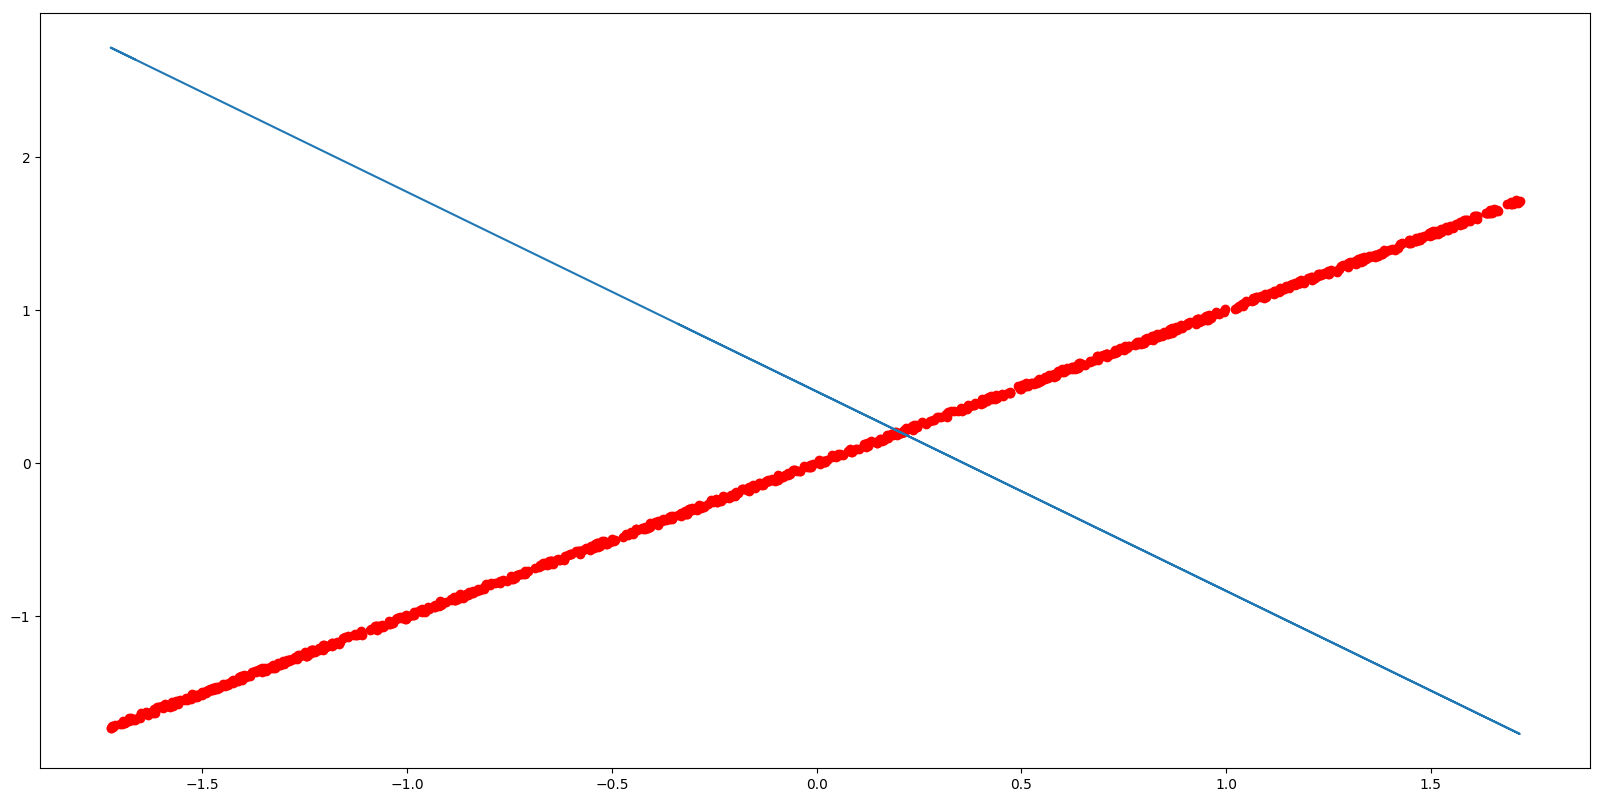

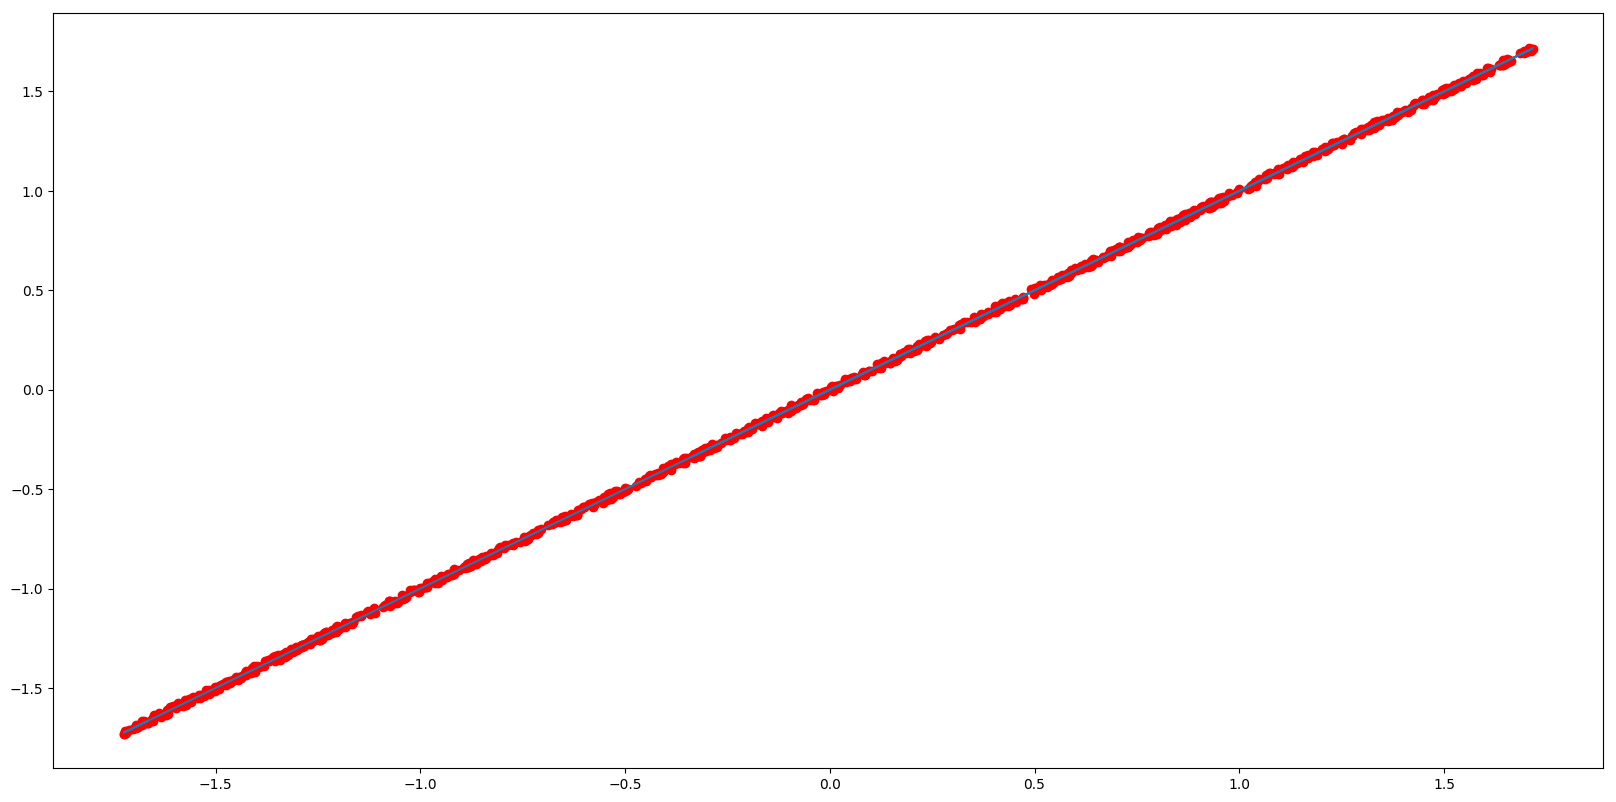

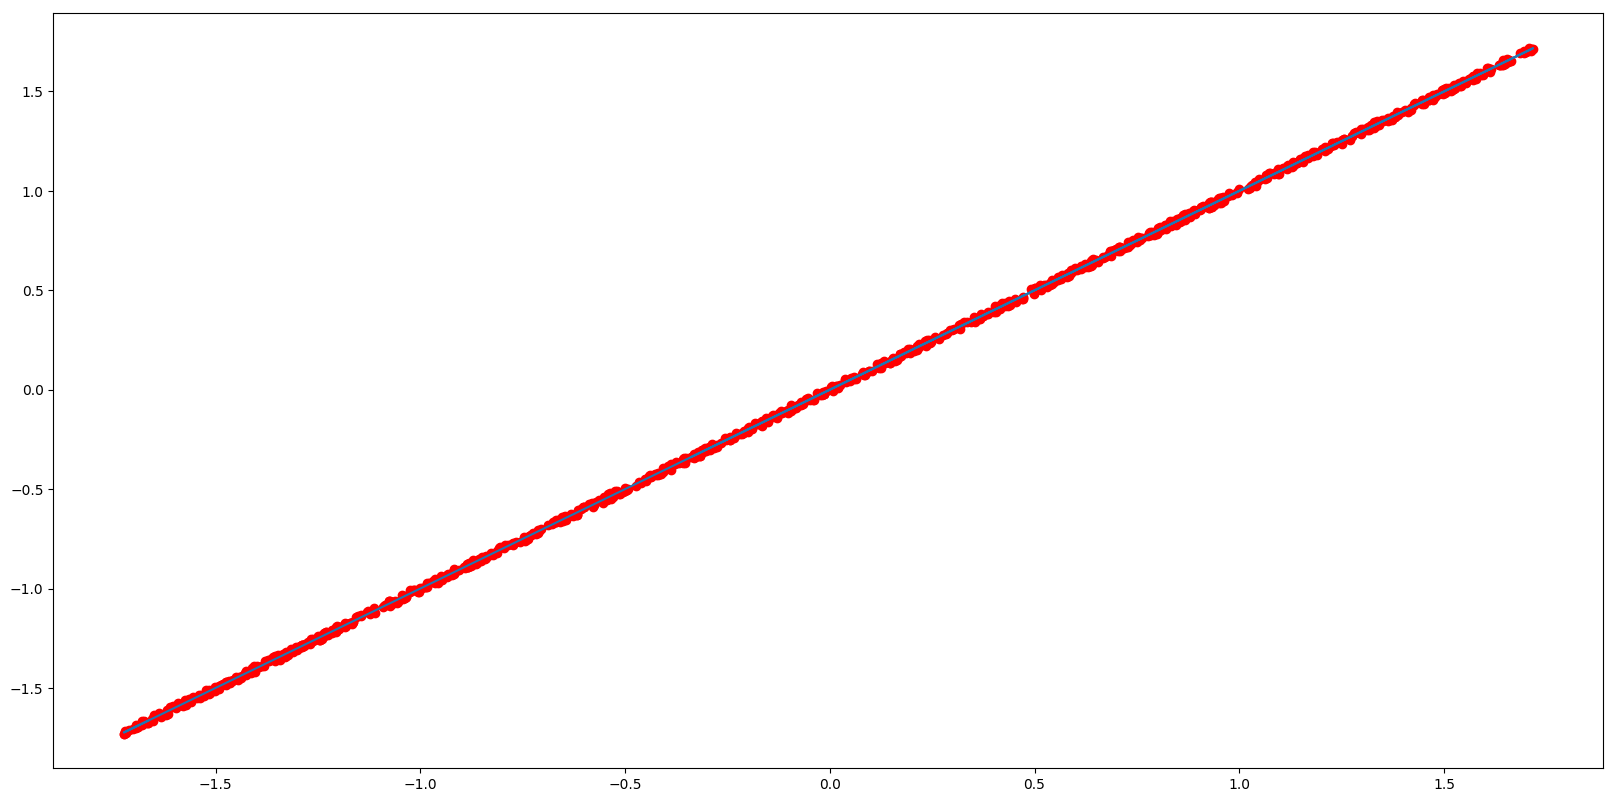

(7.990399000006004e-07, 7.798107102457979e-07)

In [2]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

def read_data(filename) :
    infile = open(filename, 'r')
    reader = csv.reader(infile, delimiter = ",")

    rowlist = []
    for row in reader :
        rowlist.append(row)

    infile.close()
    array = np.array(rowlist[1:], dtype = np.float)
    array = np.concatenate((np.ones((array.shape[0], 1)), array), axis = 1)
    array_x = array[:, :-1]
    array_y = array[:, -1]
    array_y = array_y.reshape(array_y.shape[0], 1)
    return array_x, array_y

def process_data(x, y) :
    mean_x = np.mean(x, axis = 0)
    mean_x[0] = 0
    sdev_x = np.std(x, axis = 0)
    sdev_x[0] = 1
    x = (x - mean_x) / sdev_x

    mean_y = np.mean(y)
    sdev_y = np.std(y)
    y = (y - mean_y) / sdev_y
    return x, y

def comparison_plot(x, y, w) :
    slice_size = x.shape[0] / 10
    x_sliced = x[:slice_size, ]
    x_feature = x_sliced[:, 1].reshape(slice_size)
    y_sliced = y[:slice_size, ].reshape(slice_size)

    plt.figure(figsize = (20, 10), dpi = 100)
    plt.plot(x_feature, y_sliced, 'ro')
    plt.plot(x_feature, np.dot(x_sliced, w))
    plt.show()

def grad_descent(x, y, w, lr, epochs) :

    for i in range(epochs) :
        activation = np.matmul(x, w) - y
        differential = np.matmul(np.transpose(x), activation)
        w = w - (lr * differential)

    return w

def evaluate(w1, w2) :
    x_test, y_test = read_data('test.csv')
    x_test, y_test = process_data(x_test, y_test)
    pred1 = np.matmul(x_test, w1)
    error1 = mean_squared_error(y_test, pred1)
    pred2 = np.matmul(x_test, w2)
    error2 = mean_squared_error(y_test, pred2)
    return error1, error2

# ============================================================================ #

# step 1
x_train, y_train = read_data('train.csv')
x_train, y_train = process_data(x_train, y_train)

# step 2
w1 = np.random.randn(x_train.shape[1], 1)

# step 3
comparison_plot(x_train, y_train, w1)

# step 4
z1 = np.linalg.inv(np.matmul(np.transpose(x_train), x_train))
z2 = np.matmul(np.transpose(x_train), y_train)
w2 = np.matmul(z1, z2)
comparison_plot(x_train, y_train, w2)

# step 5
w1 = grad_descent(x_train, y_train, w1, 0.0000001, 10000)

# step 6
comparison_plot(x_train, y_train, w1)

# step 7
evaluate(w1, w2)
